# Lecture 2: Gliding flight, Path Performance, and Energy Height
 
 

## Roadmap of this lecture 

Greetings again! Welcome to second lecture of the seven-part series. As before, a roadmap of the lecture is presented. Should you feel a little lost or in need of some context, this roadmap serves to provide you glimpse of the larger picture. If there are any sections you would like to jump to or revisit, feel free to directly skip ahead. 

Firstly, the [Lecture objectives](#lec-obj) are stated. These should help you understand what to expect and more importantly inform you of what you are expected to be able to do. Thereafter, gliding flight is considered [Gliding Flight](#gliding-flight). This is followed by an example of [Path Performance](#path-performance). Next the dynamic performance problem of determining the minimum-time to climb strategy is presented in sections [Minimum Time to Climb (Subsonic)](#subsonic-minimum-time-to-climb) and [Minimum Time to Climb (Supersonic)](#supersonic-minimum-time-to-climb). The strategy developed here can be extrapolated to several conditions, and hence this framework should serve as a versatile method for solving optimization problems in dynamic performance. This problem is considered under both sub- trans- and supersonic flight conditions.  Lastly, the main [Conclusions](#conclusion) are summarised, and short of preview of the next lecture is given in the section [What next?](#what-next). 

<a id="lec-obj"></a>
## Lecture Objectives 
By the end of mastering this lecture, for flights in unpowered descent, and powered climb in sub- and supersonic regimes, you should be able to:
> *describe* operational and optimal flying strategies <br>
> *derive* expressions for performance metrics <br>
> *calculate* the most relevant performance metrics <br>
> *explain* the effects of flight and aircraft parameters on performance metrics

Make sure to practice sufficiently until you are well comfortable with these objectives! 

## Gliding Flight 
Gliding refers to the flight with zero thrust. This occurs naturally in the case of engineless gliders or sailplanes, however could also be the case when engines are in idle, or the aircraft experiences engine failure. In such a case you may be inclined to think that because a glider aircraft has no propulsive system it cannot climb. This is not true! In a steady atmosphere, a glider cannot climb, however in the presence of thermals gliders in fact can climb. The reason for this is depicted below:

![alt text](\Images\lec2-gliderr.png)

To understand how a flight performs under gliding, let us begin again from the general equations of motion previously derived in [Lecture 1](Lecture%201.ipynb). These equations are reiterated below for your convenience. 

$$ T\cos{\alpha_T} -D -W \sin{\gamma} = \frac{W}{g}\dot{V} \\ L + T\sin{\alpha_T} - W\cos{\gamma} = \frac{W}{g}V\dot{\gamma}$$

Now based on the conditions for gliding, these equations can be simplified. The conditions considered are below:
1. Under gliding conditions, thrust is zero i.e., $T=0$ 
2. Under constant velocity, the time rate of change of velocity is zero i.e., $\dot{V} = 0$ 
3. Under a rectilinear trajectory, the time rate change of the flight path angle is zero, i.e., $\dot{\gamma}=0$
4. Noting that the minimum descent angle is much less than one, i.e., $ \gamma << 1$, the small angle approximation can be used 

Using these simplifications the equations of motion become:

$$ D = -W\sin{\gamma} \\ L=W$$ 

From where, 

$$ \bar{\gamma} = \sin^{-1}\left( \frac{C_D}{C_L}\right)$$

This result demonstrates a important realisation: the minimum glide angle depends *only* on pure aerodynamics. As a result, the minimum glide angle can be computed using the results from aerodynamic performance metrics. This is demonstarted below:"

$$\bar{\gamma}_{min} = \sin^{-1} \left( \frac{C_D}{C_L} \right)_{min} = \sin^{-1} \left( \frac{1}{\left( \frac{C_L}{C_D}\right)_{max}} \right)$$

Using this result, the speed for minimum glide angle can be computed:

$$V_{\bar{\gamma}_{min}} = \sqrt{\frac{2}{\rho}\frac{W}{S}\frac{1}{C_{L_{opt}}}}$$

From this equation two notes must be made:
1. The optimum glide speed is dependent on weight, the higher the weight the greater the speed. 
2. The higher the optimum glide speed, the more horizontal distance can be covered and less time to the ground. 


## Path Performance 

For further analysis of problems encountered in flight mechanics it is useful to define two different types of performance metrics, namely point performance and path performance. Point performance refers to quantities that are dependent on the instantaneous values of the states and controls. This is the case for quantities such as maximum speed in level flight, maximum climb angle, rate of climb, etc. Conversely, path performance refers to quantities that are dependent on the history of the states and controls. Mathematically, path performance can be obtained by integrating point performance. This is the case for quantities such as time to climb, range and endurance in cruise, take-off and landing distances, etc. 

In general quantities associated with path performance are described by a system of nonlinear differential equations. In such cases analytical closed form solutions may not be convenient (and in some complex situations may not exist). Usually several assumptions and simplifications are introduced to solve the problem analytically. However, another method of solving such problems is through calculating the integral performance. This idea is executed as follows: at a given time instant, the states and controls are known. Using these known values the required parameters can be calculated. Assuming a flight plan, this procedure can be iterated at a suitable time step leading towards the desired solution. This idea is illustrated by a simple example. 

Let us consider the problem where one wants to find the time required to climb to an altitude 2000m. During this climb, we assume the weight of the aircraft is not constant as fuel is being burned and that the flight plan states the indicated airspeed is a constant 170kts. Let us consider the calculations under an altitude increment of 500m, thus at each iteration the aircraft will have ascended by 500m. Lastly, assume the initial condition (point performance) states that the weight is 70000kg, rate of climb of 14.9m/s, and a fuel flow of 2.9kg/s. 

Hence, to calculate these quantities when the aircraft reaches an altitude of 500m, consider the following equations: 
$$RoC = V \sin{\gamma} = \frac{\Delta h}{\Delta t} \Rightarrow \Delta t = \frac{\Delta h}{RoC}$$
After obtaining $\Delta t$ the time to reach 500m can be calculated as follows:
$$ t_2 = t_1 + \Delta t $$
In addition, now the weight of the aircraft can be updated based on the fuel burned, as the fuel burned is equal to the fuel flow multiplied with the burn time, hence:
$$ W_2 = W_1 - FF \Delta t $$

These calculations can be repeated for each altitude increment. Doing so leads to the following table: 

| Pressure altitude (m) | Weight (kg) | Indicated Airspeed (kts) | Rate of Climb (m/s) | Fuel Flow (kg/s) | Ground speed (m/s) | Time (s) 
| :- | :- | :- | :- | :- | :- | :- |
| 0 | 70000| 170 | 14.9 | 2.9 | 85.3 | 0
| 500 | 69904 | 170 | 14.7 | 2.8 | 87.1 | 33
| 1000 | 69809 | 170 |14.5 | 2.7 | 89.4 | 67
| 1500 | 69715 | 170 | 14.2 | 2.6 | 91.7 | 102 
| 2000 | 69623 | 170 | 14.0 | 2.6 | 94.1 | 137 

## Subsonic Minimum-Time to Climb 

An interesting question to consider in dynamic performance is the optimal minimum time to climb strategy, should that exist. At first thought, one might think that following the local maxima in the rate of climb curve (see ...) is the globally optimal strategy. However, integrating the locally optimal flight performance does **not** result in the globally optimal trajectory. The proof of this statement exceeds the scope of this course but can be understood through the calculus of variations. [For those interested feel free to .... ]

In fact the solutions to most dynamic performance problems, such as minimum time to climb, steepest climb or computing the most economical climb strategy are dependent on understanding the concept of total energy. The total energy of the airplane, refers to the sum of the potential and kinetic energy, hence:

$$E = WH + \frac{1}{2}\frac{W}{g_0}V^2$$

Now, let us define a new quantity, the total energy per unit weight of the aircraft, known as energy height and denoted by $H_e$:

$$H_e = H +\frac{V^2}{2g_0}$$

The concept of energy height is crucial because it is measure of the geopotential and geometric altitude that an aircraft can attain provided it trades all of its kinetic energy for potential energy. As a result, the most time efficient method of climbing is based on the notion of converting kinetic energy into potential energy, such that energy height remains constant. To visualise how such a curve looks, consider the following plot:



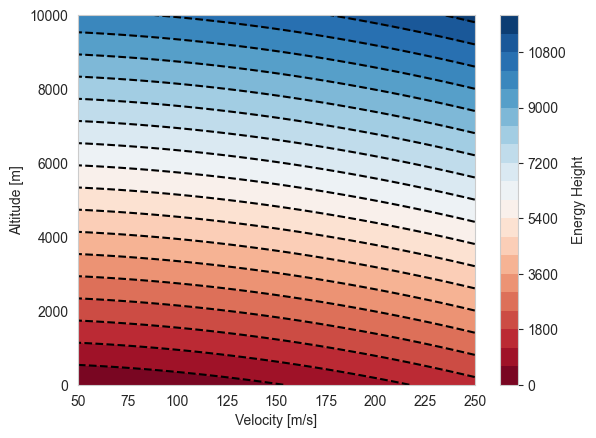

In [1]:
from function_file import *

energy_height_curve()

Having seen the idea of energy heights, the formal problem statement can be written as:

$$ \text{min} (t_1) = \int_{t_0}^{t_1} dt = \int_{h_0}^{h_1} \frac{dh}{RoC} = \int_{h_0}^{h_1} \frac{1+\frac{V}{g} \frac{\partial V}{\partial h}}{RoC_{\text{steady}}}$$

To minimise the result of the integral there exists two possibilities, either minimise $\frac{V}{g} \frac{\partial V}{\partial h}$ or maximise $RoC_{\text{steady}}$. However, this results in conflicting objectives; should the aircraft accelerate or decelerate? 

To understand this, let us reformulate the problem statement in terms of energy height:
Firstly, the rate of change of energy height can be calculated as: 

$$ H_e = H +\frac{V^2}{2g_0} \Rightarrow \frac{dh_E}{dt} = \frac{dh}{dt} + \frac{V}{g} \frac{dV}{dt} = \frac{dh}{dt} \left( 1+ \frac{V}{g}\frac{\partial V}{\partial h} \right) $$

Hence, the problem can be restated as: 

$$ t = \int_{h_{E,0}}^{h_{E,1}} \frac{dh_E}{RoC_{\text{steady}}} $$

In other words, using the notion of energy height it allows us to treat an unsteady problem as if it were steady. Therefore, the globally optimal strategy is to fly at the speed that occurs at the trangency point between the $RoC$ curve and the $h_E$ line. 


In [1]:
# energy_height_roc()

aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

output = interactive_output(energy_height_roc, {'name': aircraft_name})

# display(button)

def on_button_click(b):
    output = interactive_output(energy_height_roc, {'name': aircraft_name})
    output.clear_output()
    with output:
        energy_height_roc(aircraft_name.value)

button.on_click(on_button_click)

display(output)

NameError: name 'widgets' is not defined

<span style='color:green'>Challenge!
Can you calculate the performance using the "ideal" energy conversion?

## Supersonic Minimum-Time to Climb 

The idea of finding the optimal minimum-time to climb under trans- and super- sonic conditions, is the same as that for subsonic conditions. However, considerations of compressibility must be taken into account. As discussed extensively in your courses on aerodynamics, after a particular Mach number, the critical Mach number, supersonic flow is experienced over the airfoil. Close to this Mach number, the drag divergence Mach number also exists, after which there is a sharp increase in drag coefficient. In such cases, the drag coefficient is a function of Mach number and lift coefficient. 

Both of these effects occur mainly in the transonic regime and therefore, if the aircraft is strictly under sub- or supersonic conditions the standard procedure as described before can be used. On this contrary, if the aircraft is susceptible to transonic conditions, then the rate of climb curves are significantly different. For illustrative purposes an example plot is shown below:

![text](\Images\lec2-zoom-dive.png)

Notice how the procedure for minimum time to climb is identical, i.e., you must climb through points where the rate of climb curve is tangent to constant energy height lines. EXTRA STUFF IDK YET. This procedure is known as a zoom-dive. 

## Conclusions 

That marks the end of the first lecture! It was a lot of information to digest so, please take your time to go through all of it. Once you feel as though you have understood the bulk of the contents check if you can do the following: 

- Derive the equations of motion for gliding flight 
- Calculate the minimum descent angle and know under which condition that occurs
- Explain the concept of energy height and why it is pivotal for minim time to climb problems
- Compute the minimum time to climb given the necessary parameters in subsonic conditions
- Understand the notion and necessity for a zoom dive and especially why the transonic case is different to the subsonic case

Please use these objectives as a foundation, you are strongly encouraged to go beyond and consider further implications of the theory described.

If these objectives feel doable, please test your understanding using the practice exercises given below. 

## What's next?

- Make sure to practice and sharpen your skills! 
- Start reading the next (or previous) lectures by clicking on the lecture of your choice below!


<html>
<body>

<img src="Images\lec-timeline-no-pictures.png" usemap="#timeline">

<map name="timeline">
    <!-- Define areas and hyperlinks -->
    <area shape="rect" coords="0,0,135,135" href="Lecture 1.ipynb" alt="Notebook 1">
    <area shape="rect" coords="140,0,270,140" href="Lecture 2.ipynb" alt="Notebook 2">
    <area shape="rect" coords="280,0,410,280" href="Lecture 3.ipynb" alt="Notebook 3">
    <area shape="rect" coords="410,0,540,410" href="Lecture 4.ipynb" alt="Notebook 4">
    <area shape="rect" coords="540,0,670,540" href="Lecture 5.ipynb" alt="Notebook 5">
    <area shape="rect" coords="670,0,800,670" href="Lecture 6.ipynb" alt="Notebook 6">
    <area shape="rect" coords="800,0,930,800" href="Lecture 7.ipynb" alt="Notebook 7"> 
    <!-- Add more areas as needed -->
</map>

</body>
</html>